In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Generate some sample data

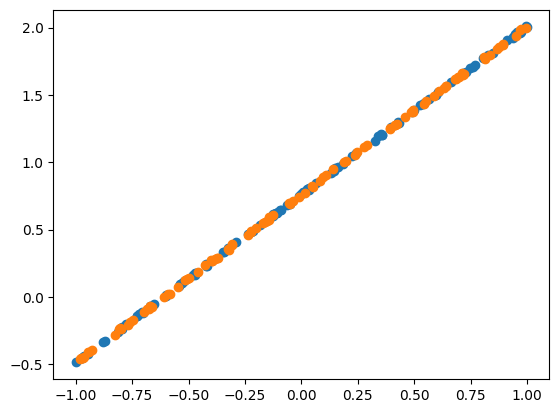

In [26]:
N = 100
A = 1.25
B = 0.75

x = (np.random.random(N) - 0.5)*2.0
y = A*x + B +  np.random.random(N)*0.025

x_test = (np.random.random(N) - 0.5)*2.0
y_test = A*x_test + B +  np.random.random(N)*0.025

plt.scatter(x,y)
plt.scatter(x_test,y_test)


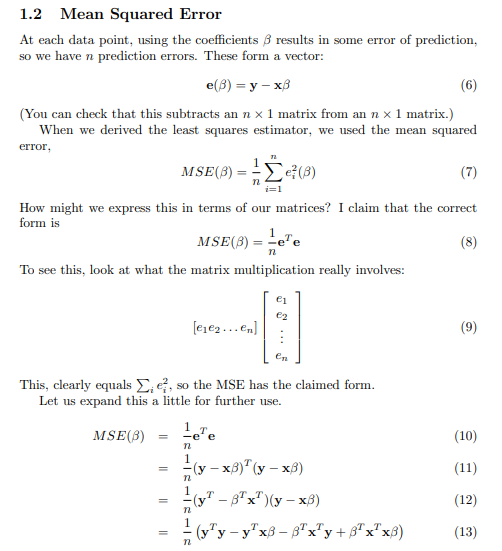
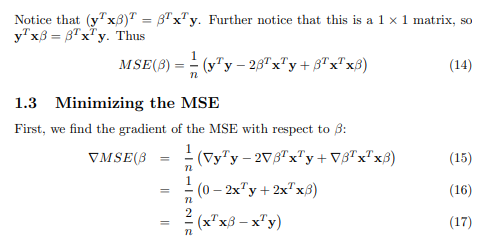

In [58]:
class myRegresson:
    def __init__(self, degree=1, regularization=0, alpha=0.1):
        self.d = degree
        self.r = regularization
        self.alpha = alpha
        self.weights = np.random.random(degree + 1)

    def fit(self, x, y):
        n = len(x)
        X = np.hstack( [ np.power(x,i).reshape((n,1)) for i in range(self.d + 1) ])

        for i in range(1000):
            y_pred = X@self.weights
            loss = np.mean(np.power(y - y_pred,2))
            if (i+1)%100 == 0:
                print(f"{i=}  {loss=:.9f}")

            match self.r:
                case 0:
                    dw = (2/n)*( X.T@X@self.weights - X.T@y )
                case 1:
                    dw = (2/n)*( X.T@X@self.weights - X.T@y ) + np.sign(self.weights)/n
                case 2:
                    dw = (2/n)*( X.T@X@self.weights - X.T@y ) + 2.0*self.weights*0.01
                case _:
                    dw = 0
            self.weights = self.weights - self.alpha*dw


    def predict(self, x):
        n = len(x)
        X = np.hstack([ np.power(x,i).reshape((n,1)) for i in range(self.d + 1) ])
        y_pred = X@self.weights
        return y_pred

i=99  loss=0.020876969
i=199  loss=0.005171181
i=299  loss=0.001641653
i=399  loss=0.000729550
i=499  loss=0.000453953
i=599  loss=0.000345023
i=699  loss=0.000287424
i=799  loss=0.000250345
i=899  loss=0.000223942
i=999  loss=0.000204115
model.weights=array([ 0.7675837 ,  1.16483976, -0.0168733 ,  0.28093237, -0.13419693,
       -0.05614107,  0.35139977, -0.28576275, -0.19369076,  0.1289014 ,
       -0.01110463])


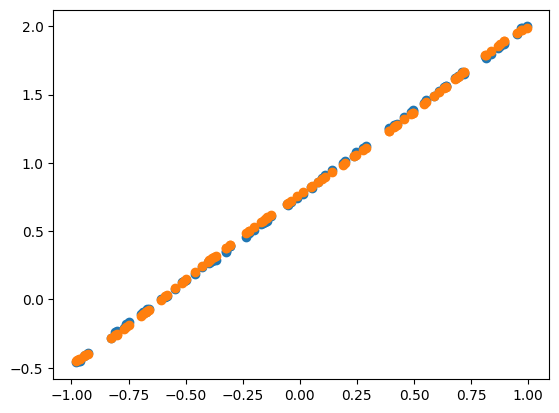

In [60]:
model = myRegresson(degree=10, regularization=0, alpha=0.05)
model.fit(x,y)
print(f"{model.weights=}")
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test)
plt.scatter(x_test,y_pred)